In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import tensorflow as tf
from tensorflow import keras
sns.set_style("darkgrid")

2023-09-04 16:57:35.830754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 16:57:35.966899: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-04 16:57:36.567766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-04 16:57:36.567869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# Path for csv files
files_path ='../../raw_data/'

# Num of trips
df = pd.read_csv(files_path + 'matrix.csv', index_col='StartDate')
df.index = pd.to_datetime(df.index)

station_number = '777'

# Choice of Station
df=df[[station_number]]

In [3]:
df

,777
StartDate,
2022-01-01 00:00:00,4
2022-01-01 01:00:00,-16
2022-01-01 02:00:00,-1
2022-01-01 03:00:00,-2
2022-01-01 04:00:00,3
...,...
2022-12-30 20:00:00,0
2022-12-30 21:00:00,0
2022-12-30 22:00:00,-3


In [4]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-30 15:00:00', '2022-12-30 16:00:00',
               '2022-12-30 17:00:00', '2022-12-30 18:00:00',
               '2022-12-30 19:00:00', '2022-12-30 20:00:00',
               '2022-12-30 21:00:00', '2022-12-30 22:00:00',
               '2022-12-30 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', name='StartDate', length=8684, freq=None)

In [5]:
files_path2 ='../../raw_data/data_1year/'

# Load features
features_preproc = pd.read_csv(files_path2 + 'final_features_preproc_12m.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

# Change 2s
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(lambda x: 1 if x>=1 else 0)

# Change names
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

#Drop Columns
features_preproc.drop(columns=['minute','second','London_zone_London_all'], inplace=True)

In [6]:
features_preproc

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,0.729469,0.061224,0.0,2.0,0.383333,1.136490,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 20:00:00,0.685990,0.122449,0.0,2.0,0.246667,1.119777,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 21:00:00,0.676329,0.142857,0.0,2.0,0.190000,1.275766,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [7]:
features_preproc.index = pd.to_datetime(features_preproc.index)

In [8]:
df = df.join(features_preproc)

In [9]:
df=df.dropna()

In [10]:
df=df.rename(columns={station_number:'nooftrips'})

In [11]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [12]:
df

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
StartDate,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,2,0.429952,0.010204,0.0,1.00,0.108333,0.523677,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 01:00:00,3,0.427536,0.010204,0.0,1.00,0.330000,0.662953,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.00,0.310000,0.668524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 04:00:00,2,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,0,0.396135,0.000000,0.0,0.76,0.401667,0.635097,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 21:00:00,0,0.388889,0.000000,0.0,1.00,0.380000,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 22:00:00,-3,0.384058,0.000000,0.0,1.00,0.388333,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df = df[['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction','weekday','strike', 'school_holidays']]

In [14]:
df['hour'] = df.index.hour
df['weekday'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month

/tmp/ipykernel_110273/681386165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/tmp/ipykernel_110273/681386165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.index.dayofweek
/tmp/ipykernel_110273/681386165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [15]:
df.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,strike,school_holidays,hour,day,month
StartDate,,,,,,,,,,,,,
2022-01-02 00:00:00,2,0.429952,0.010204,0.0,1.0,0.108333,0.523677,6,0.0,1.0,0,2,1
2022-01-02 01:00:00,3,0.427536,0.010204,0.0,1.0,0.330000,0.662953,6,0.0,1.0,1,2,1
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.0,0.310000,0.668524,6,0.0,1.0,2,2,1
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,0.0,1.0,3,2,1
2022-01-02 04:00:00,2,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,0.0,1.0,4,2,1


<Axes: xlabel='StartDate', ylabel='nooftrips'>

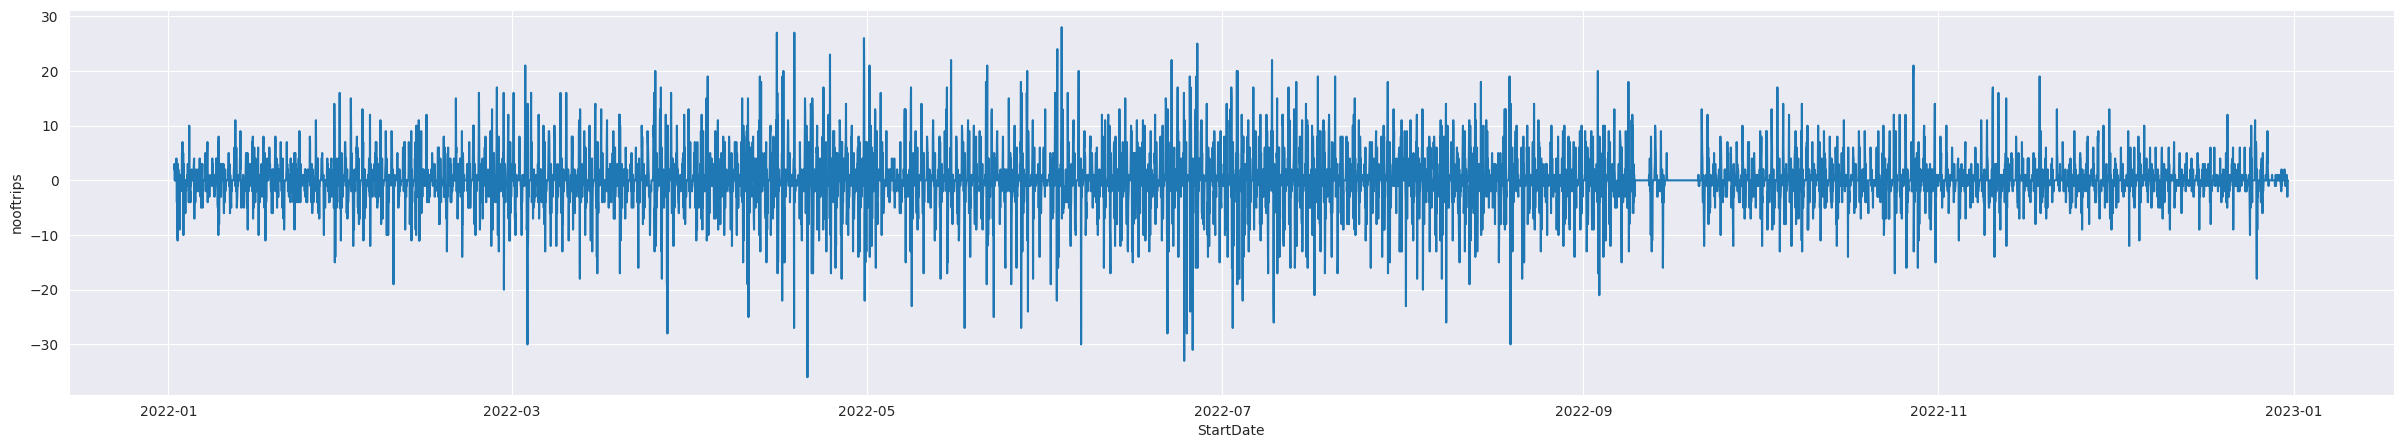

In [16]:
plt.figure(figsize=(30, 5))
sns.lineplot(x=df.index, y='nooftrips',data=df)

<Axes: xlabel='StartDate', ylabel='nooftrips'>

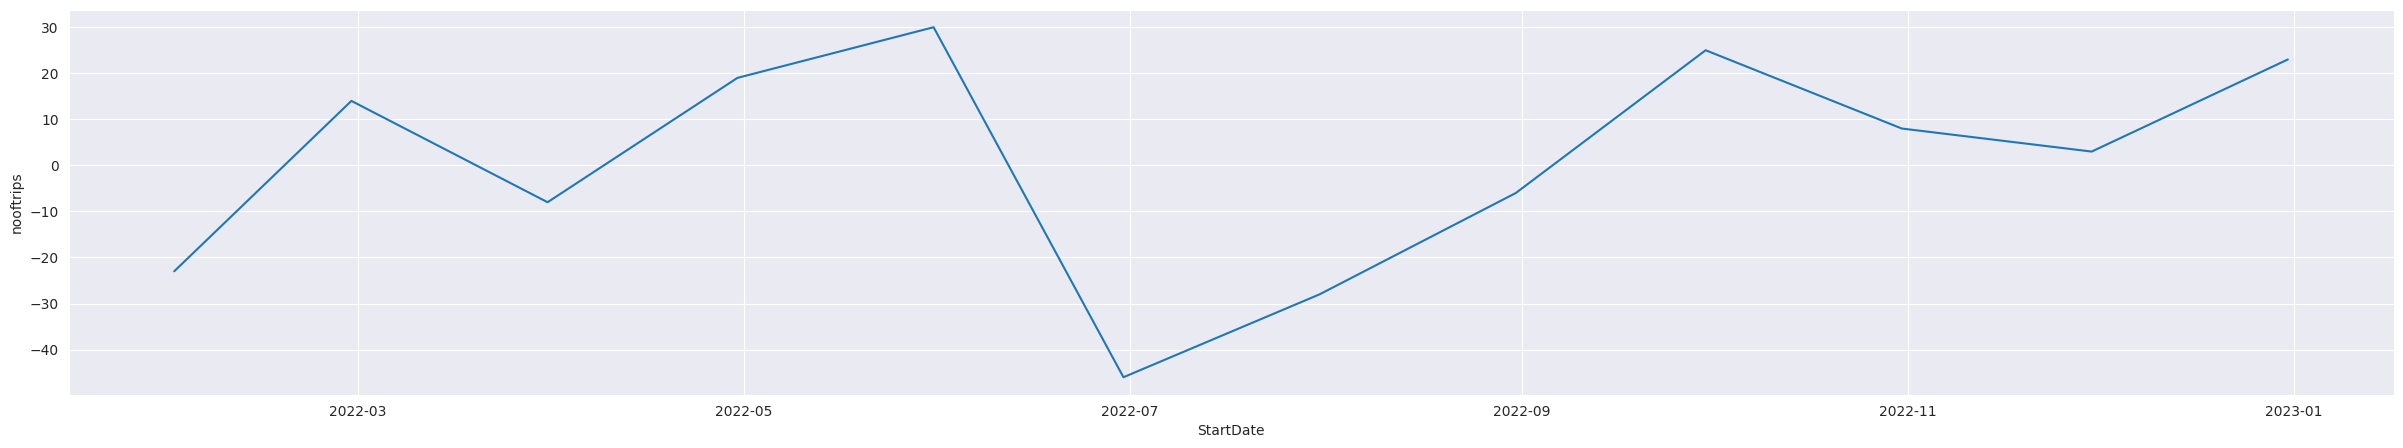

In [17]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(30,5))
sns.lineplot(x=df_by_month.index, y='nooftrips',data=df_by_month)

<Axes: xlabel='hour', ylabel='nooftrips'>

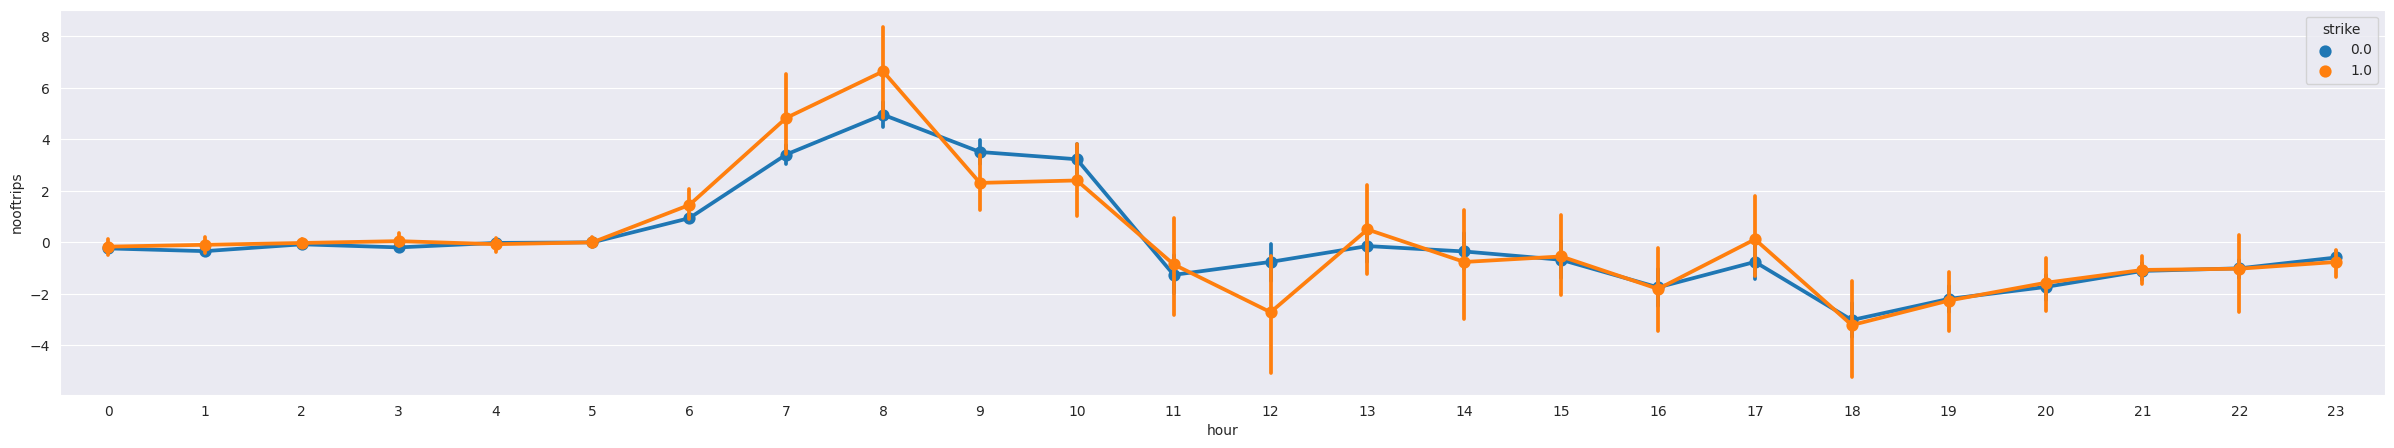

In [18]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='hour', y='nooftrips', hue = 'strike',data=df)

<Axes: xlabel='weekday', ylabel='nooftrips'>

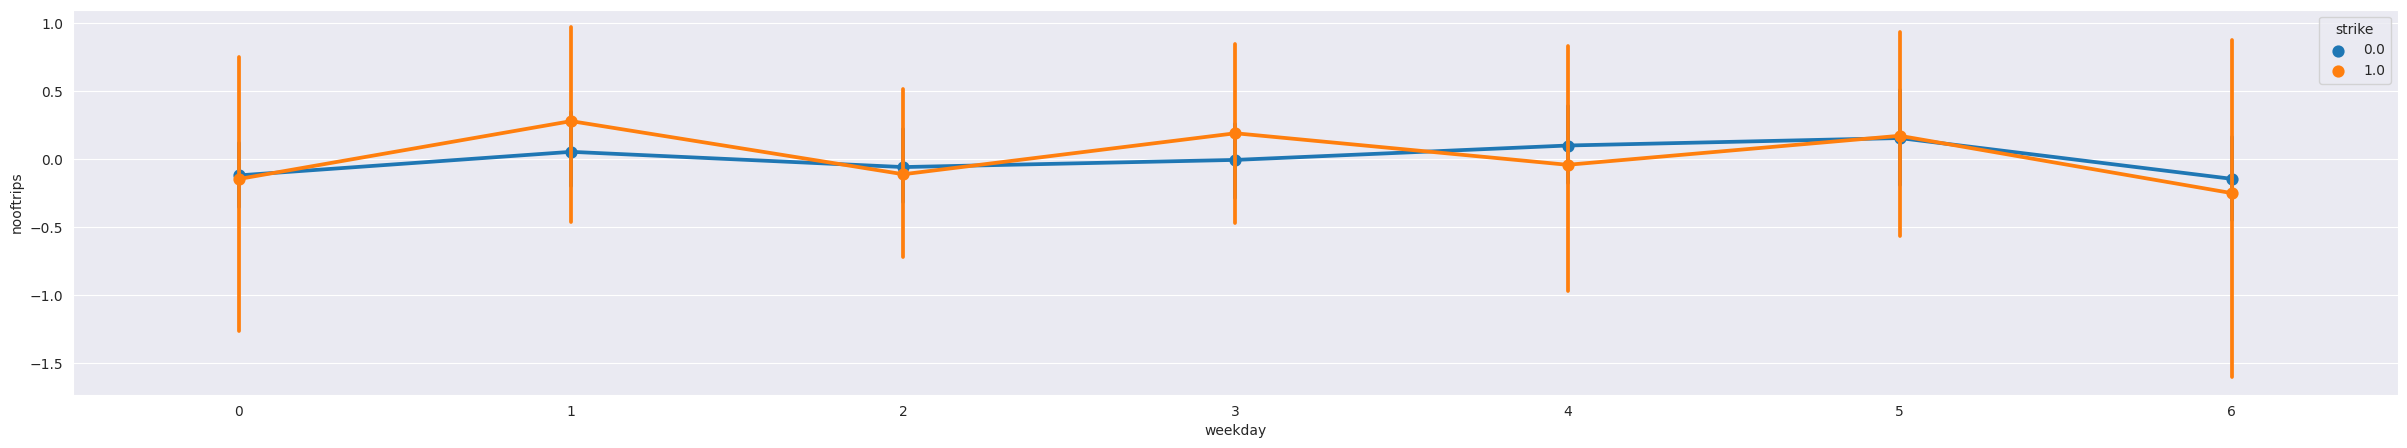

In [19]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='weekday', y='nooftrips', hue='strike',data=df)

In [20]:
import math
# Get/Compute the number of rows to train the model on
training_data_len = math.ceil(len(df) *.8) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

(8660, 13) (6928, 13) (1756, 13)


In [21]:
# Get/Compute the number of rows to train the model on
val_training_data_len = math.ceil(len(train) *.8) # taking 90% of data to train and 10% of data to test
val_testing_data_len = len(train) - val_training_data_len

time_steps = 24
val_train, val_test = train.iloc[0:val_training_data_len], train.iloc[(val_training_data_len-time_steps):len(train)]
print(train.shape, val_train.shape, val_test.shape)

(6928, 13) (5543, 13) (1409, 13)


In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
#Scale the all of the data from columns ['nooftrips']
Robust_scale = RobustScaler().fit(val_train[['nooftrips']])
val_train['nooftrips'] = Robust_scale.transform(val_train[['nooftrips']])
val_test['nooftrips'] = Robust_scale.transform(val_test[['nooftrips']])
test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])

/tmp/ipykernel_110273/105250444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_train['nooftrips'] = Robust_scale.transform(val_train[['nooftrips']])
/tmp/ipykernel_110273/105250444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_test['nooftrips'] = Robust_scale.transform(val_test[['nooftrips']])
/tmp/ipykernel_110273/105250444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [24]:
train.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'weekday', 'strike', 'school_holidays',
       'hour', 'day', 'month'],
      dtype='object')

In [25]:
train.to_numpy()
test.to_numpy()

array([[-7.50000000e-01,  4.71014493e-01,  0.00000000e+00, ...,
         1.80000000e+01,  1.80000000e+01,  1.00000000e+01],
       [-7.50000000e-01,  4.42028986e-01,  0.00000000e+00, ...,
         1.90000000e+01,  1.80000000e+01,  1.00000000e+01],
       [-2.50000000e-01,  4.22705314e-01,  0.00000000e+00, ...,
         2.00000000e+01,  1.80000000e+01,  1.00000000e+01],
       ...,
       [-7.50000000e-01,  3.84057971e-01,  0.00000000e+00, ...,
         2.20000000e+01,  3.00000000e+01,  1.20000000e+01],
       [ 0.00000000e+00,  3.76811594e-01,  1.02040816e-02, ...,
         2.30000000e+01,  3.00000000e+01,  1.20000000e+01],
       [ 0.00000000e+00,  7.53623188e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.10000000e+01,  1.20000000e+01]])

In [26]:
#Split the data into x_train and y_train data sets
X_val_train = []
y_val_train = []

for i in range(len(val_train) - time_steps):
    X_val_train.append(val_train.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    y_val_train.append(val_train.loc[:,'nooftrips'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_val_train = np.array(X_val_train)
y_val_train = np.array(y_val_train)

In [27]:
#Create the x_test and y_test data sets
X_val_test = []
y_val_test = train.loc[:,'nooftrips'].iloc[val_training_data_len:len(train)]

for i in range(len(val_test) - time_steps):
    X_val_test.append(val_test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())

#Convert x_test and y_test to numpy arrays
X_val_test = np.array(X_val_test)
y_val_test = np.array(y_val_test)

In [28]:
#Create the x_test and y_test data sets
X_test = []
y_test = df.loc[:,'nooftrips'].iloc[training_data_len:len(df)]

for i in range(len(test) - time_steps):
    X_test.append(test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [29]:
# [samples, time_steps, n_features]
# Using all 12 columns of data (take out the bike sharing amount column) to make prediction
print('Validation Train data size:')
print(X_val_train.shape, y_val_train.shape)
print('Validation Test data size:')
print(X_val_test.shape, y_val_test.shape)
print('Test data size:')
print(X_test.shape, y_test.shape)

Validation Train data size:
(5519, 24, 12) (5519,)
Validation Test data size:
(1385, 24, 12) (1385,)
Test data size:
(1732, 24, 12) (1732,)


In [30]:
#Build the LSTM network model
model = keras.Sequential()
model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(units=50, activation='tanh',input_shape=(X_val_train.shape[1], X_val_train.shape[2]))))
model.add(keras.layers.Dense(35))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(15))
model.add(keras.layers.Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2023-09-04 17:00:49.229878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-04 17:00:49.257483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-09-04 17:00:49.257547: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-09-04 17:00:49.259239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

In [32]:
history = model.fit(X_val_train, y_val_train, epochs=50, batch_size=20, validation_data=(X_val_test,y_val_test), shuffle=True, callbacks=[es])

Epoch 1/50
276/276 [==============================] - 8s 19ms/step - loss: 1.7843 - val_loss: 15.4951
Epoch 2/50
276/276 [==============================] - 4s 15ms/step - loss: 1.6751 - val_loss: 15.2403
Epoch 3/50
276/276 [==============================] - 5s 19ms/step - loss: 1.6327 - val_loss: 15.0698
Epoch 4/50
276/276 [==============================] - 5s 19ms/step - loss: 1.6115 - val_loss: 14.9984
Epoch 5/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5814 - val_loss: 14.6444
Epoch 6/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5814 - val_loss: 14.7758
Epoch 7/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5631 - val_loss: 14.8852
Epoch 8/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5599 - val_loss: 14.7035
Epoch 9/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5551 - val_loss: 14.6161
Epoch 10/50
276/276 [==============================] - 5s 19ms/step - loss: 1.5499

In [35]:
y_pred = model.predict(X_test)
y_pred = Robust_scale.inverse_transform(y_pred)#Undo scaling
y_pred

55/55 [==============================] - 0s 5ms/step


array([[-3.0079296 ],
       [-3.1903455 ],
       [-3.2999077 ],
       ...,
       [-2.2219818 ],
       [-1.1931719 ],
       [-0.27949283]], dtype=float32)

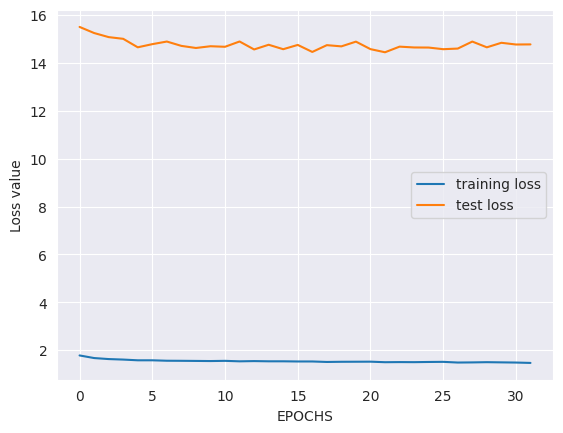

In [36]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

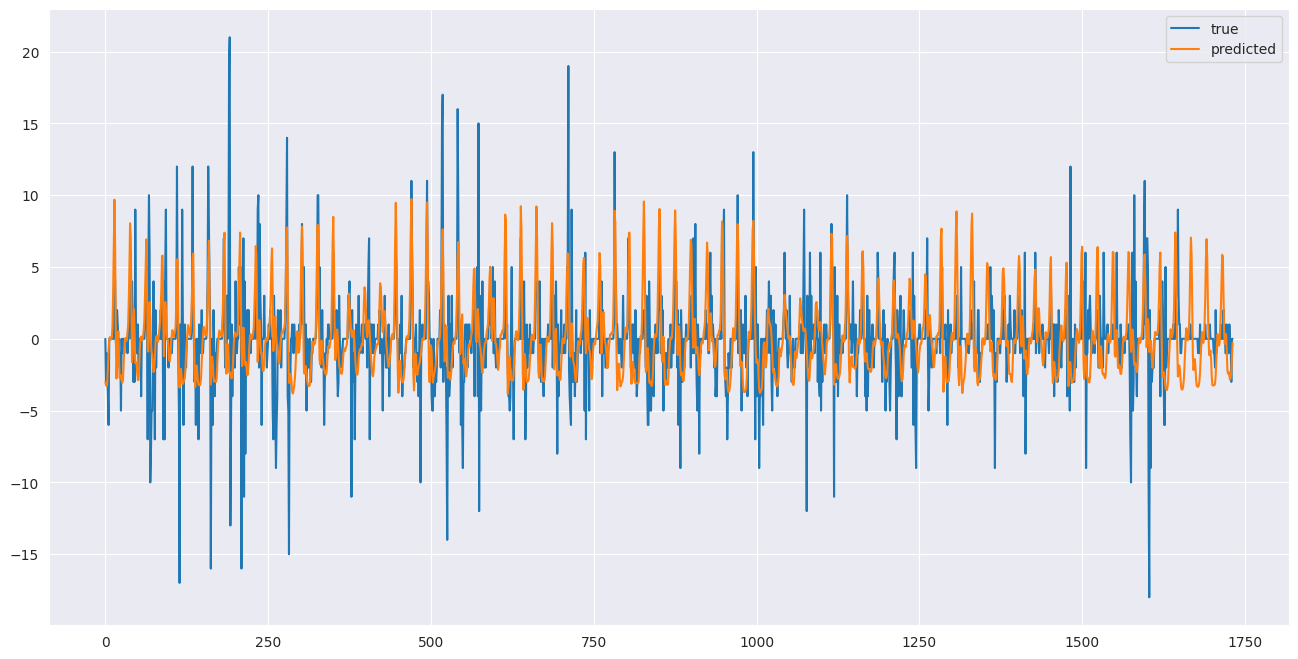

In [37]:
#Pcik some values to zoom in
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()

In [42]:
test

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,strike,school_holidays,hour,day,month
StartDate,,,,,,,,,,,,,
2022-10-18 18:00:00,-0.75,0.471014,0.000000,0.0,0.32,0.205000,0.016713,1,0.0,0.0,18,18,10
2022-10-18 19:00:00,-0.75,0.442029,0.000000,0.0,0.35,0.223333,0.022284,1,0.0,0.0,19,18,10
2022-10-18 20:00:00,-0.25,0.422705,0.000000,0.0,0.72,0.223333,0.016713,1,0.0,0.0,20,18,10
2022-10-18 21:00:00,-0.50,0.413043,0.000000,0.0,0.80,0.228333,0.008357,1,0.0,0.0,21,18,10
2022-10-18 22:00:00,-0.25,0.410628,0.000000,0.0,0.95,0.253333,0.019499,1,0.0,0.0,22,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,0.00,0.396135,0.000000,0.0,0.76,0.401667,0.635097,4,0.0,1.0,20,30,12
2022-12-30 21:00:00,0.00,0.388889,0.000000,0.0,1.00,0.380000,0.629526,4,0.0,1.0,21,30,12
2022-12-30 22:00:00,-0.75,0.384058,0.000000,0.0,1.00,0.388333,0.629526,4,0.0,1.0,22,30,12


In [51]:
len(test) - time_steps

1732

In [52]:
X_test.shape

(1732, 24, 12)